# Progetto: Previsione consumi elettrici del Trentino 
## Corso: Introduzione alla Data Science
### Autori: Puleo Gianmarco, Saiani Anna

## Obiettivi del progetto:  
### Usando i dati relativi ai consumi elettrici, le previsioni meteo ed inquinamento abbiamo sviluppato le seguenti richieste : 


### 1. Esploratory Data Analysis (EDA) 


### 2. Classificazione e previsione fasce di consumo zone urbane di Trento 


### 3. Regressione e previsione consumi Provincia di Trento e Comune di Trento 



## Obiettivi del progetto:  
Usando i dati relativi ai consumi elettrici, le previsioni meteo ed inquinamento abbiamo sviluppato le seguenti richieste : 

1. Attraverso tecniche di Esporatory Data Analysis (EDA) (abbiamo indivisuato le zone della Provincia Autonoma di Trento che presentano i maggiori consumi e variazioni significative fra giorno e notte e fra giorni feriali e festivi)


2. Classificazione e previsione fasce di consumo zone urbane di Trento (Una volta diviso il territorio urbano di Trento in 2 zone abbiamo usato degli algoritmi di classificazione per cercare di prevedere qualitativamente i consumi infrasettimanali (alto, medio, basso) dal giorno prima al giorno successivo per ciascuna zona)


3. Regressione e previsione consumi Provincia di Trento e Comune di Trento (Attraverso algoritmi di regressione abbiamo cercato di prevedere quantitativamente i consumi di energia per l'intera provincia di Trento e per la zona centrale del comune di Trento)


In [1]:
import sys
sys.path.append('../')
sys.path.append('../src')
import src.visualization.EDA_Trento as EDA
import src.visualization.mappe as maps
import src.visualization.plotregression as pltreg
import src.visualization.classificazione as pltcla
import src.visualization.EDA_provincia as EDAprov
import warnings
warnings.filterwarnings('ignore')

Dati meteo importati correttamente!
Dati consumi importati correttamente!
Dati inquinamento importati correttamente!


/home/anna/anaconda3/envs/newDS/lib/python3.10/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


## Assunzioni e semplificazioni
* Per motivi di privacy i dati raccolti dei consumi sono dati mediati sulle intere linee elettriche di riferimento
* Per la regressione e la classificazione sono stati usati solo i giorni infrasettimanali
* La divisione delle zone è stata fatta in base alla più vicina stazione meteo
* Data la sua rilevanza,solo la zona TRENTO LASTE è stata utilizzata per la regressione

## 1. Esploratory Data Analysis (EDA)

Slide 1: Consumi intero trentino e zona di Trento 

### EDA : Mappa dei consumi Trentino
La mappa rappresenta i consumi dell'intero mese ed evidenzia il fatto che la zona della città di Trento è come ci si aspetta la zona con i consumi più alti 

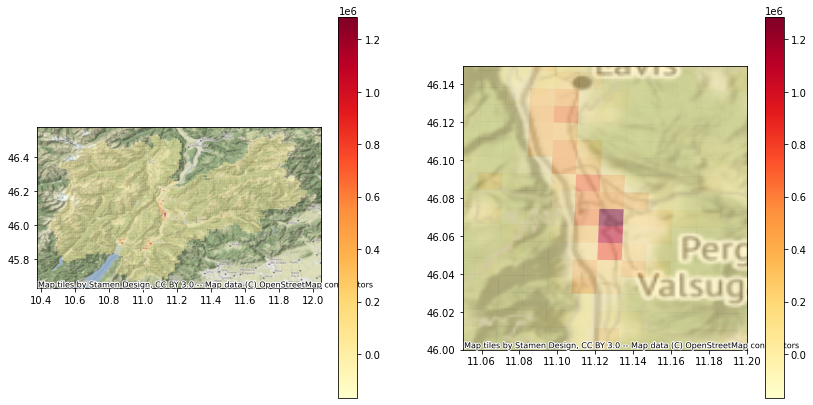

In [2]:
maps.plot_mappa_consumi_lordi()

Slide 2: Slide con variazioni Week-end e giorno notte 

### EDA: Mappa variazione dei consumi
La mappa rappresenta la variazione dei consumi dalle ore diurne rispetto a quelle notturne: 

Qui sarebbe il caso di aggiustare le immagini per metterle una di fianco all'altra 

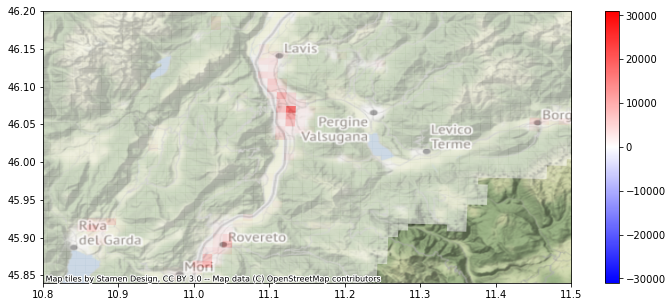

In [4]:
maps.plot_mappa_diff_giorno_notte()

### EDA: Mappa variazione dei consumi
La mappa rappresenta la variazione dei consumi nei giorni lavorativi rispetto al fine settimana: 

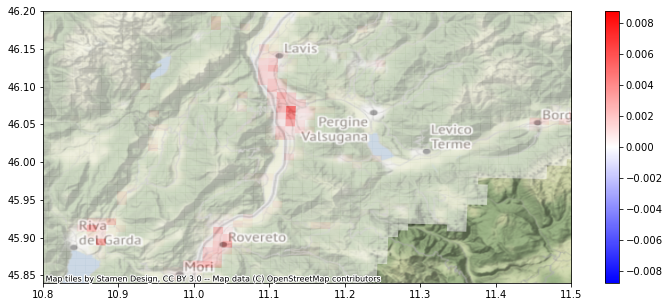

In [2]:
maps.plot_mappa_diff_wknd()

Slide 3 = mappa dell'intero territorio con le stazioni meteo e zoom zona di Trentoo 

### EDA : Mappe stazioni meteo
Mappe che rappresentano la posizione delle stazioni di rilevazione meteo sul territorio Trentino

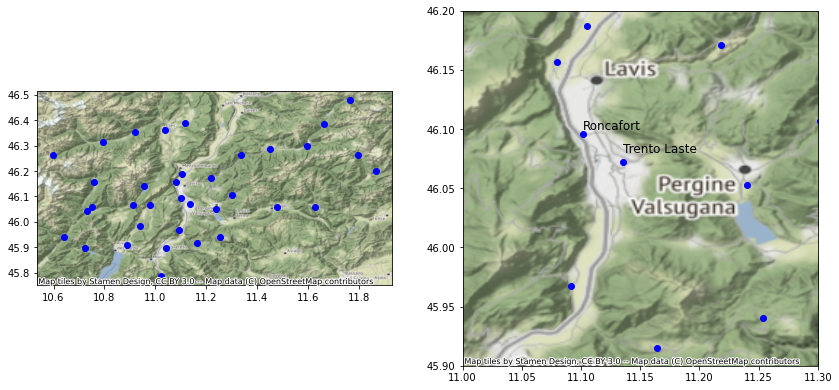

In [5]:
maps.plot_mappa_stazioni()

Slide 4 = come abbiamo diviso le zone di Trento mappa zone totale e zoommata su Trento 

### EDA : Fasce consumi
Mappa che rappresenta la divisione in zone della provincia di Trento

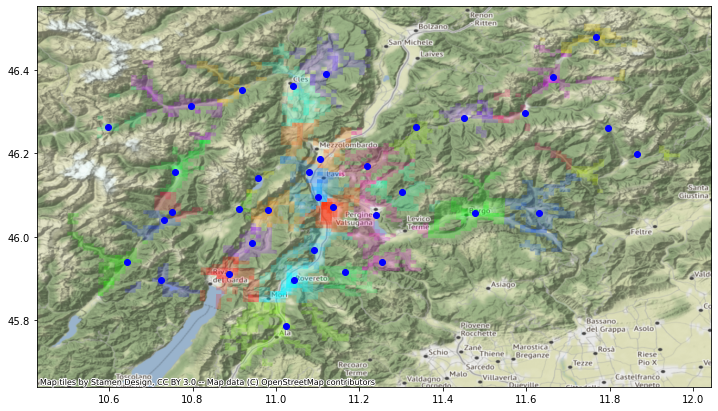

In [3]:
maps.plot_suddivisione_regioni(luogo='provincia')

### EDA : Fasce consumi
Mappa che rappresenta la divisione in zone urbane del comune di Trento

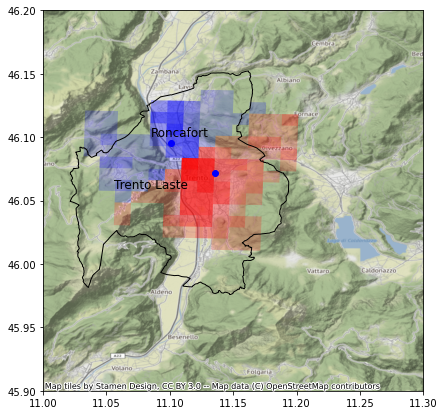

In [2]:
maps.plot_suddivisione_regioni(luogo='comune')

### EDA : Fasce consumi
Istogrammi che rappresentano la distribuzione dei consumi nelle varie fasce orarie

Slide 5: Istogrammi 

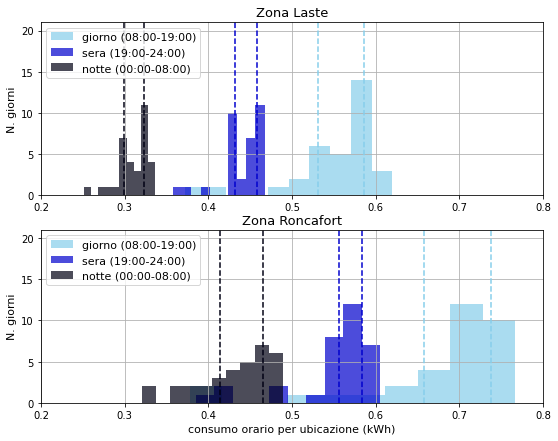

In [2]:
EDA.histplotconsumi()

slide 6 = Matrice di covarianza delle features 

### EDA : Correlazioni
Matrice di covarianza features utilizzate per la classificazione zone di Trento 

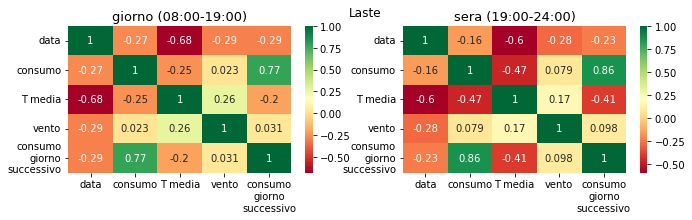

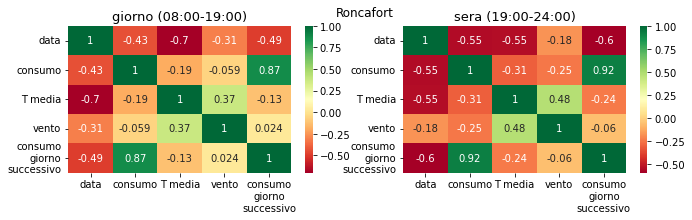

In [3]:
EDA.edaConsumiZoneTrento(mode="corr")

slide 7 = Stagionalità

### EDA: Stagionalità 
Grafico che evudenziano la stagionalità dei consumi nelle due zone di Trento

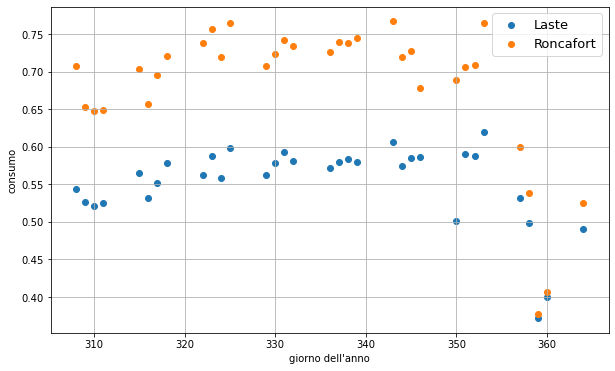

In [4]:
EDA.edaConsumiZoneTrento(mode="season")

### EDA: Matrice di correlazione regressione 
Matrice di correlazione su tutte le features

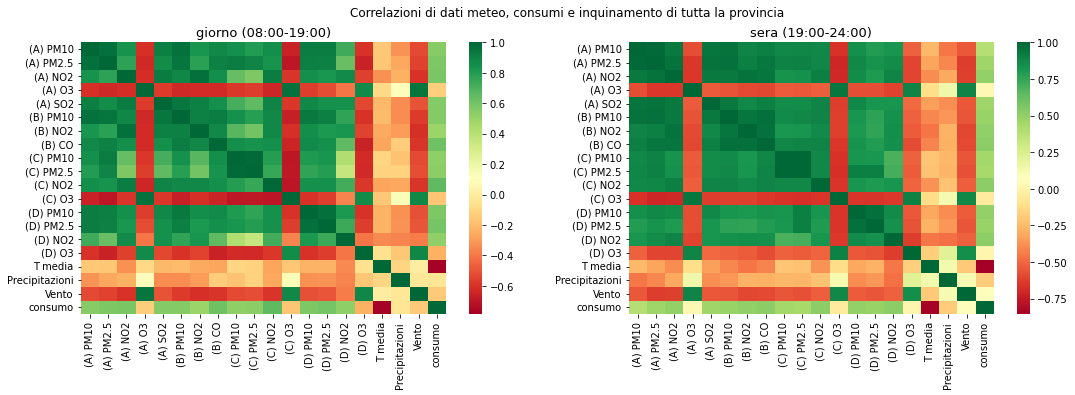

In [5]:
EDAprov.corrMatrix()

### EDA:  Correlazioni
Scatter plot sulle features effettivamente usate per la regressione

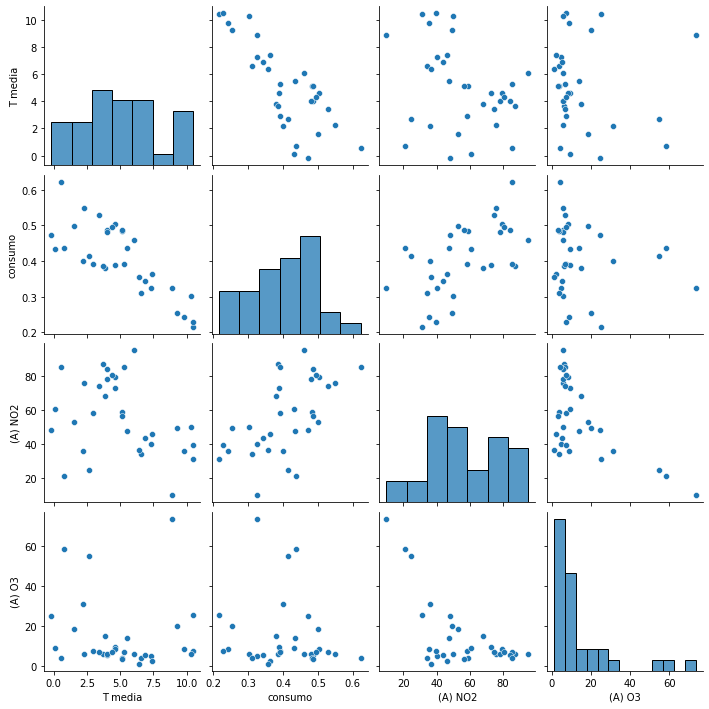

In [3]:
EDAprov.corrPlots()

slide 8 = Random Forest ( Confusion Matrix) 

## 2. Classificazione 
### - Random Forest
### - Neural Network
### - Logistic Regression Classifier

slide 9 = Neural Network

### Classificazione - Random Forest
#### Train e Test 

Performance del classificatore RF sull'insieme train.
Lo score sui dati della fascia oraria giorno (08:00-19:00) è 1.0.
Lo score sui dati della fascia oraria sera (19:00-24:00) è 1.0.


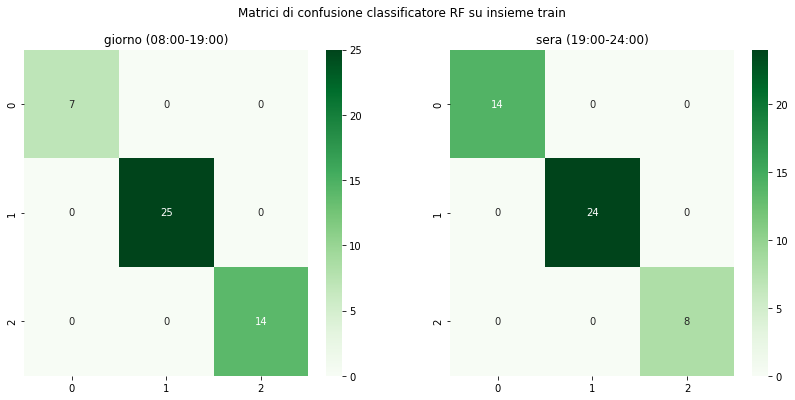

Performance del classificatore RF sull'insieme test.
Lo score sui dati della fascia oraria giorno (08:00-19:00) è 0.75.
Lo score sui dati della fascia oraria sera (19:00-24:00) è 0.8.


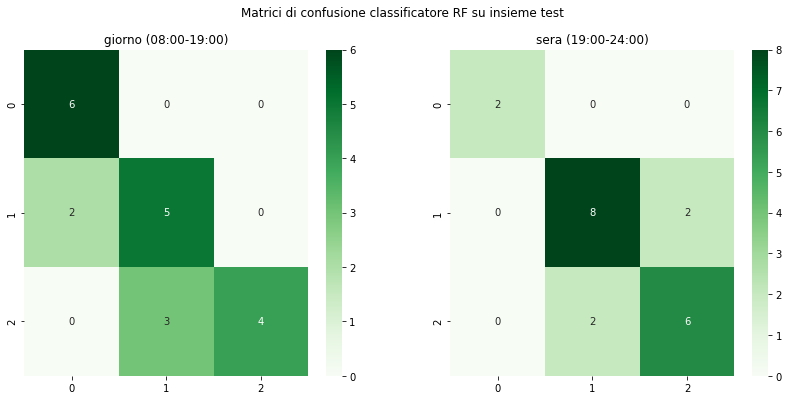

In [2]:
pltcla.confMat(classifier_name = "RF", subset="train")
pltcla.confMat(classifier_name = "RF", subset="test")

### Classificazione - Neural Network
#### Train e Test 

Performance del classificatore NNW sull'insieme train.
Lo score sui dati della fascia oraria giorno (08:00-19:00) è 0.782608695652174.
Lo score sui dati della fascia oraria sera (19:00-24:00) è 0.7391304347826086.


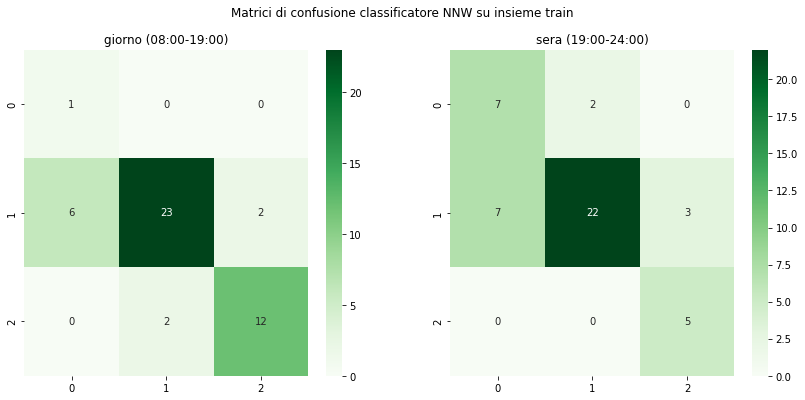

Performance del classificatore NNW sull'insieme test.
Lo score sui dati della fascia oraria giorno (08:00-19:00) è 0.55.
Lo score sui dati della fascia oraria sera (19:00-24:00) è 0.7.


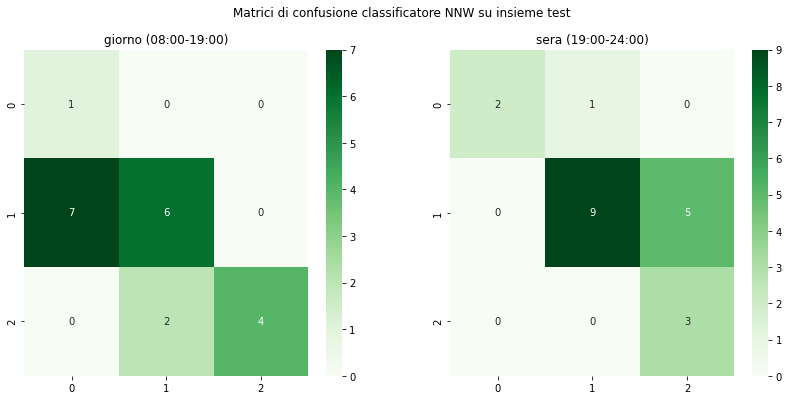

In [3]:
pltcla.confMat(classifier_name = "NNW", subset="train")
pltcla.confMat(classifier_name = "NNW", subset="test")

### Classificazione - Logistic Regression Classifier
#### Train e Test 

Performance del classificatore LR sull'insieme train.
Lo score sui dati della fascia oraria giorno (08:00-19:00) è 0.8913043478260869.
Lo score sui dati della fascia oraria sera (19:00-24:00) è 0.8043478260869565.


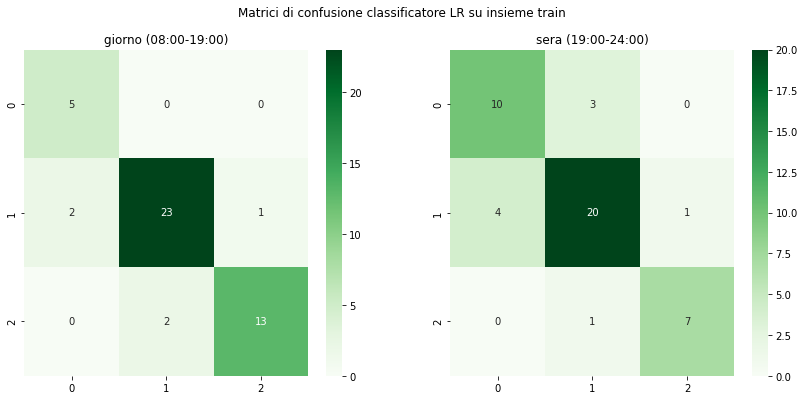

Performance del classificatore LR sull'insieme test.
Lo score sui dati della fascia oraria giorno (08:00-19:00) è 0.7.
Lo score sui dati della fascia oraria sera (19:00-24:00) è 0.7.


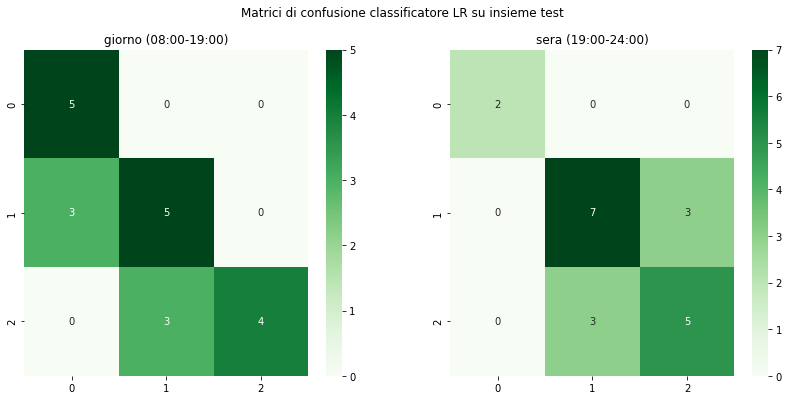

In [4]:
pltcla.confMat(classifier_name = "LR", subset="train")
pltcla.confMat(classifier_name = "LR", subset="test")

## 3. Regressione

### Regressione - Score e features 

Grafico che mostra gli score della regressione sul database dei consumi diurni dell'intera provincia 

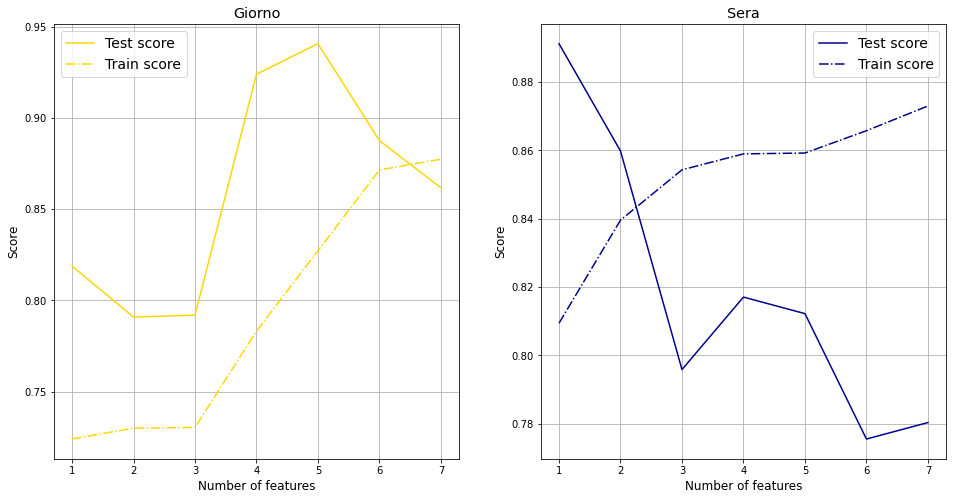

In [9]:
pltreg.plotregr()

slide 12 = Conclusion

## Conclusioni

slide 13 = future improvments 

## Conclusioni
### Sviluppi futuri 

* Capire meglio come affrontare il problema della stagionalità

* Riuscire a migliorare la categorizzazione e la regressione utilizzando non più un solo giorno precedente, ma diversi giorni precedenti 

* Pensare di dividere il territorio urbano di Trento in zone riferite alle principali circoscrizioni



## Conclusioni
### Migioramenti futuri 

* Capire meglio come affrontare il problema della stagionalità
(, per poter eventualmente usare i modelli anche in altri momenti dell'anno solare )
* Riuscire a migliorare la categorizzazione e la regressione utilizzando non più un solo giorno precedente, ma diversi giorni precedenti ( per questo ci servirebbero + dati ) 
* Dividere ulteriormente il giorno in due fasce orarie per vedere se effettivamente fasce più fini possono portare un vantaggio 
* Pensare di dividere il territorio urbano di Trento in zone riferite alle principali circostrizioni(, in modo da vedere se effttivamente si può discretizzare ulteriormente in funzione della distribuzione dei consumi )

